In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [49]:
df = pd.read_csv("data/ratings_clean_names.csv")
df.head(2)

userId  rating  movieId   timestamp       title_safe
0    2038     2.0       18  1305046590  Four Rooms(5.0)
1    2858     4.0       18   856639289  Four Rooms(5.0)

In [50]:
pivoted = df.pivot_table(index='title_safe', columns='userId', values='rating')
pivoted = pivoted.fillna(0)
pivoted.head(2)

userId                              22      25      33      35      77      \
title_safe                                                                   
(500) Days of Summer(19913.0)          0.0     0.0     0.0     0.0     0.0   
10 Things I Hate About You(4951.0)     0.0     0.0     0.0     0.0     0.0   

userId                              80      93      126     147     148     \
title_safe                                                                   
(500) Days of Summer(19913.0)          0.0     0.0     0.0     0.0     0.0   
10 Things I Hate About You(4951.0)     0.0     0.0     0.0     0.0     0.0   

userId                              ...  270707  270721  270771  270799  \
title_safe                          ...                                   
(500) Days of Summer(19913.0)       ...     0.0     0.0     0.0     0.0   
10 Things I Hate About You(4951.0)  ...     0.0     3.0     0.0     0.0   

userId                              270829  270830  270832  270834  270884  \
title_safe                                                                   
(500) Days of Summer(19913.0)          0.0     0.0     0.0     0.0     0.0   
10 Things I Hate About You(4951.0)     0.0     0.0     0.0     0.0     0.0   

userId                              270891  
title_safe                                  
(500) Days of Summer(19913.0)          0.0  
10 Things I Hate About You(4951.0)     0.0  

[2 rows x 17906 columns]

In [14]:
#use PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
embedding = pca.fit_transform(pivoted)
px.scatter(x=embedding[:,0], y=embedding[:,1],hover_name=pivoted.index)

## Analysis
Since we see that the 3 lord of the rings movies are close in space for instance, it means that the result is not random, but yet it seems not really relevant

In [17]:
#Same with TSNE
tsne = TSNE(n_components=2)
embedding = tsne.fit_transform(pivoted)
px.scatter(x=embedding[:,0], y=embedding[:,1],hover_name=pivoted.index)

## Analysis
This result is much more logical, with most series closeby, and some genre proximities, such as super-hero movies...


In [19]:
#Same with TSNE
tsne = TSNE(n_components=2, perplexity=100)
embedding = tsne.fit_transform(pivoted)
px.scatter(x=embedding[:,0], y=embedding[:,1],hover_name=pivoted.index)

In [20]:
#Same with TSNE
tsne = TSNE(n_components=2, perplexity=5)
embedding = tsne.fit_transform(pivoted)
px.scatter(x=embedding[:,0], y=embedding[:,1],hover_name=pivoted.index)

## Analysis
The perplexity is supposed to control if we focus on the larger pictures, or if concentrate on local similarities. However, with the recommended parameters, we do not observe very meaningful changes

In [21]:
pca = PCA(n_components=50)
embedding1 = pca.fit_transform(pivoted)

#Same with TSNE
tsne = TSNE(n_components=2)
embedding = tsne.fit_transform(embedding1)
px.scatter(x=embedding[:,0], y=embedding[:,1],hover_name=pivoted.index)


In [22]:
pca = PCA(n_components=50)
embedding1 = pca.fit_transform(pivoted)

#Same with TSNE
tsne = TSNE(n_components=2,perplexity=5)
embedding = tsne.fit_transform(embedding1)
px.scatter(x=embedding[:,0], y=embedding[:,1],hover_name=pivoted.index)

In [41]:
pca = PCA(n_components=50)
embedding1 = pca.fit_transform(pivoted)

#Same with TSNE
tsne = TSNE(n_components=2,perplexity=500)
embedding = tsne.fit_transform(embedding1)
px.scatter(x=embedding[:,0], y=embedding[:,1],hover_name=pivoted.index,color=pivoted.avg_time)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

## Analysis 
although it is far from perfect, we see that we now have a clear separation of movie series, or series by the same company (disney...) or director (george Lucas) when we use a low resolution. With a high resolution, it is harder to interpret. One factor that could make things difficult is the release years of movies: movies published on a same year will tend to be liked by people of a certain age, and this mix with the genre to get something not necessarily intuitive...

# Correlation to network

In [53]:
import networkx as nx

In [51]:
#use pairwise_distne to compute cosne similarity between all movies
from sklearn.metrics.pairwise import pairwise_distances
distances = pairwise_distances(pivoted,metric='cosine')
distances = pd.DataFrame(distances, index=pivoted.index, columns=pivoted.index)
distances.head(2)

title_safe                          (500) Days of Summer(19913.0)  \
title_safe                                                          
(500) Days of Summer(19913.0)                        1.110223e-16   
10 Things I Hate About You(4951.0)                   8.957991e-01   

title_safe                          10 Things I Hate About You(4951.0)  \
title_safe                                                               
(500) Days of Summer(19913.0)                             8.957991e-01   
10 Things I Hate About You(4951.0)                        3.330669e-16   

title_safe                          101 Dalmatians(11674.0)  \
title_safe                                                    
(500) Days of Summer(19913.0)                      0.986557   
10 Things I Hate About You(4951.0)                 0.970889   

title_safe                          12 Angry Men(389.0)  \
title_safe                                                
(500) Days of Summer(19913.0)                  0.950840   
10 Things I Hate About You(4951.0)             0.960737   

title_safe                          2 Days in the Valley(9401.0)  \
title_safe                                                         
(500) Days of Summer(19913.0)                           1.000000   
10 Things I Hate About You(4951.0)                      0.995956   

title_safe                          20,000 Leagues Under the Sea(173.0)  \
title_safe                                                                
(500) Days of Summer(19913.0)                                  0.987811   
10 Things I Hate About You(4951.0)                             0.988670   

title_safe                          2001: A Space Odyssey(62.0)  \
title_safe                                                        
(500) Days of Summer(19913.0)                          0.976775   
10 Things I Hate About You(4951.0)                     0.972558   

title_safe                          28 Days Later(170.0)  300(1271.0)  \
title_safe                                                              
(500) Days of Summer(19913.0)                   0.956995     0.961664   
10 Things I Hate About You(4951.0)              0.945178     0.962225   

title_safe                          A Beautiful Mind(453.0)  ...  \
title_safe                                                   ...   
(500) Days of Summer(19913.0)                      0.935245  ...   
10 Things I Hate About You(4951.0)                 0.967005  ...   

title_safe                          Wyatt Earp(12160.0)  X-Men(36657.0)  \
title_safe                                                                
(500) Days of Summer(19913.0)                       1.0        0.977721   
10 Things I Hate About You(4951.0)                  1.0        0.920102   

title_safe                          X-Men: Days of Future Past(127585.0)  \
title_safe                                                                 
(500) Days of Summer(19913.0)                                   0.980127   
10 Things I Hate About You(4951.0)                              0.994020   

title_safe                          X-Men: First Class(49538.0)  X2(36658.0)  \
title_safe                                                                     
(500) Days of Summer(19913.0)                          0.981152     0.983751   
10 Things I Hate About You(4951.0)                     0.994028     0.965289   

title_safe                          You've Got Mail(9489.0)  \
title_safe                                                    
(500) Days of Summer(19913.0)                      0.965803   
10 Things I Hate About You(4951.0)                 0.928858   

title_safe                          Young Frankenstein(3034.0)  \
title_safe                                                       
(500) Days of Summer(19913.0)                         0.987703   
10 Things I Hate About You(4951.0)                    0.980536   

title_safe                          Young Guns(11967.0)  Zombieland(19908.0)  \
ti

In [52]:
#filter out values that are too large
distances[distances>0.5] = 0

In [57]:
#remove self loops and isolated nodes
g = nx.from_pandas_adjacency(distances)
g.remove_edges_from(nx.selfloop_edges(g))
g.remove_nodes_from(list(nx.isolates(g)))

In [58]:
print("number of nodes:", len(g.nodes()))
print("number of edges:", len(g.edges()))

number of nodes: 108
number of edges: 476


{'A Time to Kill(1645.0)': Text(-0.8182702949444579, -0.08219678450031384, 'A Time to Kill(1645.0)'),
 'Ace Ventura: Pet Detective(3049.0)': Text(0.014940427771703837, -0.1327445006021543, 'Ace Ventura: Pet Detective(3049.0)'),
 'Ace Ventura: When Nature Calls(9273.0)': Text(-0.06034371125936756, -0.2207871574231182, 'Ace Ventura: When Nature Calls(9273.0)'),
 'Addams Family Values(2758.0)': Text(-0.0426642197468669, -0.13695871177372046, 'Addams Family Values(2758.0)'),
 'Aladdin(812.0)': Text(0.0011111605982278168, -0.1369112841079532, 'Aladdin(812.0)'),
 'Alien(348.0)': Text(-0.38187946025388897, -0.8960373051834216, 'Alien(348.0)'),
 'Aliens(679.0)': Text(-0.34695180589347274, -0.8718460189245161, 'Aliens(679.0)'),
 'Apollo 13(568.0)': Text(0.05372118598695362, -0.08927246163543684, 'Apollo 13(568.0)'),
 'Babe(9598.0)': Text(0.05977559331976394, -0.010576245177550521, 'Babe(9598.0)'),
 'Batman Forever(414.0)': Text(0.019590433778805302, -0.11658902654389555, 'Batman Forever(414.0)'

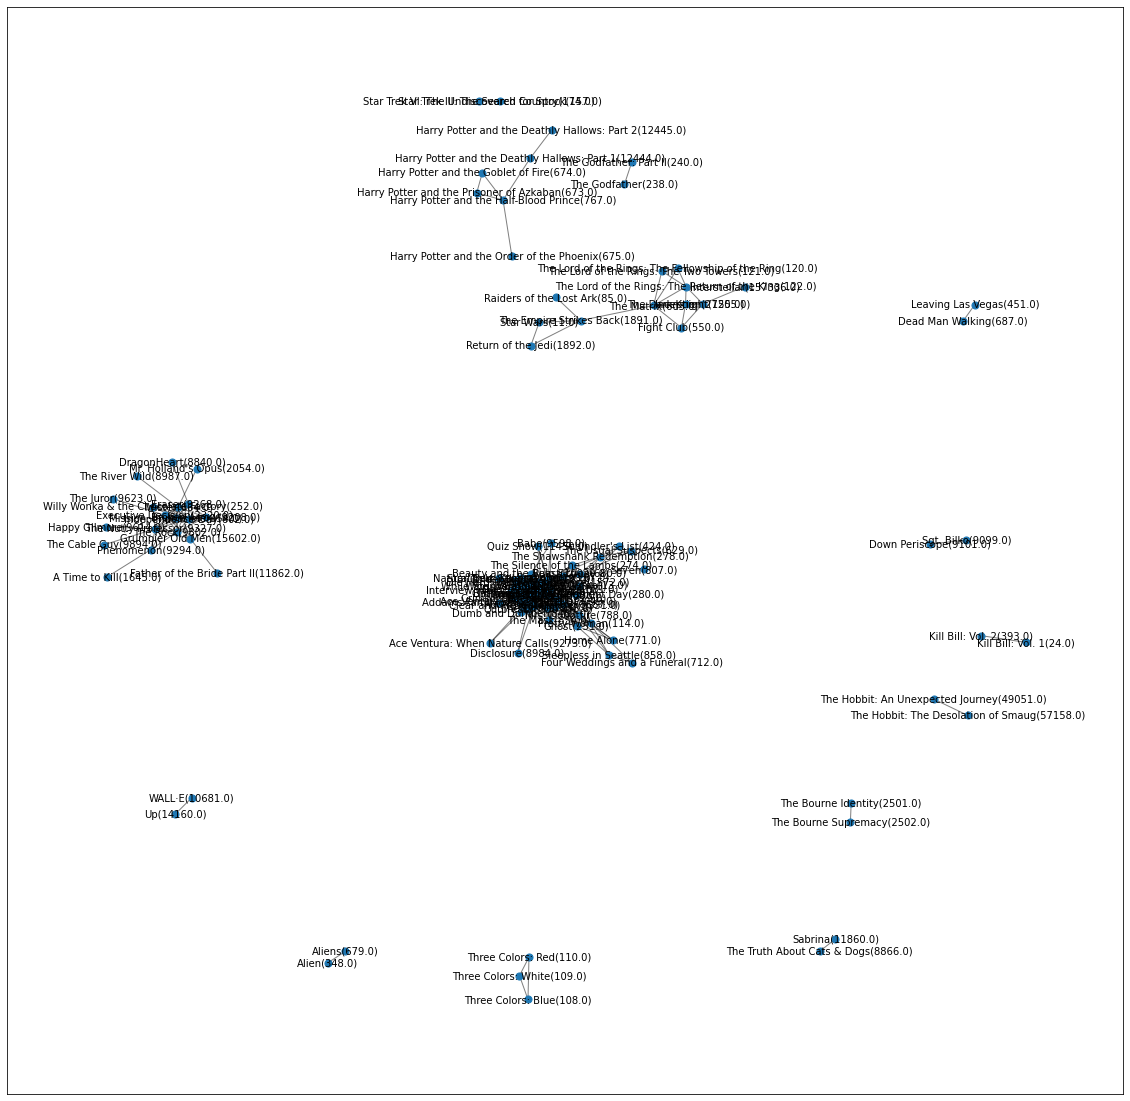

In [62]:
#plot with labels in a large figure and nice design
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=50)
nx.draw_networkx_edges(g, pos, alpha=0.5)
nx.draw_networkx_labels(g, pos, font_size=10)


In [75]:
#use node2vec to embed the graph
from node2vec import Node2Vec
node2vec = Node2Vec(g, dimensions=20, walk_length=5, num_walks=100, workers=4)
model = node2vec.fit(window=5, min_count=1, batch_words=4)


Computing transition probabilities:   0%|          | 0/108 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 25/25 [00:00<00:00, 631.30it/s]


In [84]:
#got nodes names


In [76]:
#embed node2vec in 2D with tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
embedding = tsne.fit_transform(model.wv.vectors)
#embedding = pd.DataFrame(embedding, index=model.wv.index2word, columns=['x', 'y'])

In [83]:
px.scatter(x=embedding[:,0], y=embedding[:,1],hover_name=model.wv.index_to_key)

In [87]:
distances = pairwise_distances(pivoted,metric='cosine')
distances = pd.DataFrame(distances, index=pivoted.index, columns=pivoted.index)
distances[distances>0.8] = 0
g = nx.from_pandas_adjacency(distances)
g.remove_edges_from(nx.selfloop_edges(g))
g.remove_nodes_from(list(nx.isolates(g)))



In [88]:
print("number of nodes:", len(g.nodes()))
print("number of edges:", len(g.edges()))

number of nodes: 641
number of edges: 6907


In [89]:
node2vec = Node2Vec(g, dimensions=20, walk_length=5, num_walks=100, workers=4)
model = node2vec.fit(window=5, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/641 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 25/25 [00:00<00:00, 64.34it/s]


In [90]:
tsne = TSNE(n_components=2)
embedding = tsne.fit_transform(model.wv.vectors)
px.scatter(x=embedding[:,0], y=embedding[:,1],hover_name=model.wv.index_to_key)

## Analysis
Indeed, we observe that by first doing a network, and then an embedding of that network, we observe a map which is maybe easier to understand than directly doing the embedding.
Of course, this should be studied in details quantitatively, and depends a lot on parameters, etc.